In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/India/LANDSAT_NDVI/Landsat_ndvi_2001_weekl.csv')
df

,S.No.,DISTRICT,DT_CEN_CD,ST_CEN_CD,ST_NM,date,mean
0,1,Chandigarh,1,4,Chandigarh,2001-01-01T00:00:00,0.206043
1,2,Data Not Available,99,99,Jammu and Kashmir,2001-01-01T00:00:00,0.016797
2,3,Anantnag,6,1,Jammu and Kashmir,2001-01-01T00:00:00,0.040989
3,4,Badgam,4,1,Jammu and Kashmir,2001-01-01T00:00:00,0.079289
4,5,Baramula,2,1,Jammu and Kashmir,2001-01-01T00:00:00,0.083400
...,...,...,...,...,...,...,...
304434,304435,Thanjavur,21,33,Tamil Nadu,2020-09-13T00:00:00,0.440714
304435,304436,Thiruvarur,20,33,Tamil Nadu,2020-09-13T00:00:00,0.416249
304436,304437,Nagapattinam,19,33,Tamil Nadu,2020-09-13T00:00:00,0.330633
304437,304438,Pondicherry,2,34,Puducherry,2020-09-13T00:00:00,0.076307


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304439 entries, 0 to 304438
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   S.No.      304439 non-null  int64  
 1   DISTRICT   304439 non-null  object 
 2   DT_CEN_CD  304439 non-null  int64  
 3   ST_CEN_CD  304439 non-null  int64  
 4   ST_NM      304439 non-null  object 
 5   date       304439 non-null  object 
 6   mean       304439 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 16.3+ MB


In [5]:
np.sort(df['ST_CEN_CD'].unique()), len(df['ST_CEN_CD'].unique())

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 99]), 36)

In [6]:
for i in np.sort(df['ST_CEN_CD'].unique()):
    print(df[df['ST_CEN_CD'] == i]['ST_NM'].values[58])

Jammu and Kashmir
Himachal Pradesh
Punjab
Chandigarh
Uttarakhand
Haryana
Delhi  & NCR
Rajasthan
Uttar Pradesh
Bihar
Sikkim
Arunanchal Pradesh
Nagaland
Manipur
Mizoram
Tripura
Meghalaya
Assam
West Bengal
Jharkhand
Orissa
Chhattisgarh
Madhya Pradesh
Gujarat
Daman & Diu
Dadara & Nagar Havelli
Maharashtra
Andhra Pradesh
Karnataka
Goa
Lakshadweep
Kerala
Tamil Nadu
Puducherry
Andaman & Nicobar Island
Jammu and Kashmir


In [7]:
df[df['DISTRICT'] == 'Data Not Available']

,S.No.,DISTRICT,DT_CEN_CD,ST_CEN_CD,ST_NM,date,mean
1,2,Data Not Available,99,99,Jammu and Kashmir,2001-01-01T00:00:00,0.016797
146,147,Data Not Available,99,99,Jammu and Kashmir,2001-01-09T00:00:00,-0.036428
304,305,Data Not Available,99,99,Jammu and Kashmir,2001-01-17T00:00:00,0.028044
489,490,Data Not Available,99,99,Jammu and Kashmir,2001-01-25T00:00:00,-0.012267
811,812,Data Not Available,99,99,Jammu and Kashmir,2001-02-02T00:00:00,0.034867
...,...,...,...,...,...,...,...
303177,303178,Data Not Available,99,99,Jammu and Kashmir,2020-08-12T00:00:00,0.139062
303278,303279,Data Not Available,99,99,Jammu and Kashmir,2020-08-20T00:00:00,0.116925
303417,303418,Data Not Available,99,99,Jammu and Kashmir,2020-08-28T00:00:00,0.089618
303778,303779,Data Not Available,99,99,Jammu and Kashmir,2020-09-05T00:00:00,0.127962


In [8]:
df[df['DT_CEN_CD'] == 1]['ST_NM'].unique(),len(df[df['DT_CEN_CD'] == 1]['ST_NM'].unique())

(array(['Chandigarh', 'Jammu and Kashmir', 'Himachal Pradesh',
        'Uttarakhand', 'Haryana', 'Rajasthan', 'Uttar Pradesh',
        'Meghalaya', 'Assam', 'Gujarat', 'Karnataka', 'Goa',
        'Dadara & Nagar Havelli', 'Punjab', 'Sikkim', 'Nagaland',
        'Manipur', 'Maharashtra', 'Delhi  & NCR', 'Madhya Pradesh',
        'Andaman & Nicobar Island', 'Bihar', 'Arunanchal Pradesh',
        'Mizoram', 'Tripura', 'West Bengal', 'Jharkhand', 'Orissa',
        'Kerala', 'Puducherry', 'Andhra Pradesh', 'Lakshadweep',
        'Chhattisgarh', 'Tamil Nadu', 'Daman & Diu'], dtype=object), 35)

In [9]:
df['date'] = pd.to_datetime(df['date'])



---

# India

Yearly and monthly analysis on country dataset which is derived from original dataset and using ML to predict NDVI mean values on monthly dataset

In [10]:
data = df.drop(['DISTRICT', 'DT_CEN_CD', 'ST_CEN_CD','ST_NM'], axis = 1)
data['YEAR'] = data['date'].dt.year
data['MONTH'] = data['date'].dt.month
data

,S.No.,date,mean,YEAR,MONTH
0,1,2001-01-01,0.206043,2001,1
1,2,2001-01-01,0.016797,2001,1
2,3,2001-01-01,0.040989,2001,1
3,4,2001-01-01,0.079289,2001,1
4,5,2001-01-01,0.083400,2001,1
...,...,...,...,...,...
304434,304435,2020-09-13,0.440714,2020,9
304435,304436,2020-09-13,0.416249,2020,9
304436,304437,2020-09-13,0.330633,2020,9
304437,304438,2020-09-13,0.076307,2020,9


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304439 entries, 0 to 304438
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   S.No.   304439 non-null  int64         
 1   date    304439 non-null  datetime64[ns]
 2   mean    304439 non-null  float64       
 3   YEAR    304439 non-null  int64         
 4   MONTH   304439 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 11.6 MB




---

## Year wise


In [12]:
grouped = data.groupby(['YEAR'])
mean = []
YEAR = []

for name, group in grouped:
    mean.append(group['mean'].mean())
    YEAR.append(name)

dict = {
  'mean' : mean,
  'YEAR' : YEAR
}

country_data = pd.DataFrame(dict)

In [13]:
country_data

,mean,YEAR
0,0.281809,2001
1,0.277228,2002
2,0.272727,2003
3,0.270249,2004
4,0.269641,2005
5,0.277030,2006
6,0.274056,2007
7,0.282129,2008
8,0.276388,2009
9,0.264925,2010


Text(0.5, 1.0, 'Pearson correlation plot using heatmap')

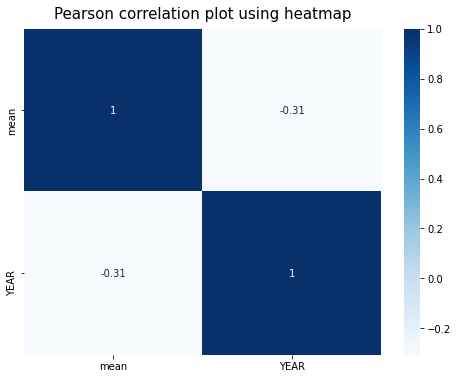

In [14]:
plt.figure(figsize = (8, 6))
sns.heatmap(country_data.corr(), annot = True, cmap = 'Blues')
plt.title('Pearson correlation plot using heatmap', fontdict = {'fontsize' : 15},pad = 10)

Text(0.5, 1.0, 'Frequency plot for mean over 20 years')

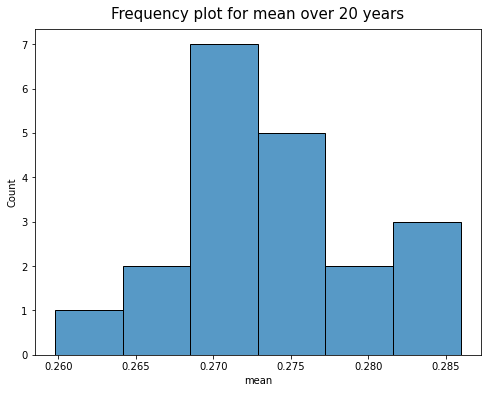

In [15]:
plt.figure(figsize = (8, 6))
sns.histplot(country_data['mean'])
plt.title('Frequency plot for mean over 20 years', fontdict = {'fontsize' : 15},pad = 10)

Text(0.5, 1.0, 'NDVI mean vs Year plot')

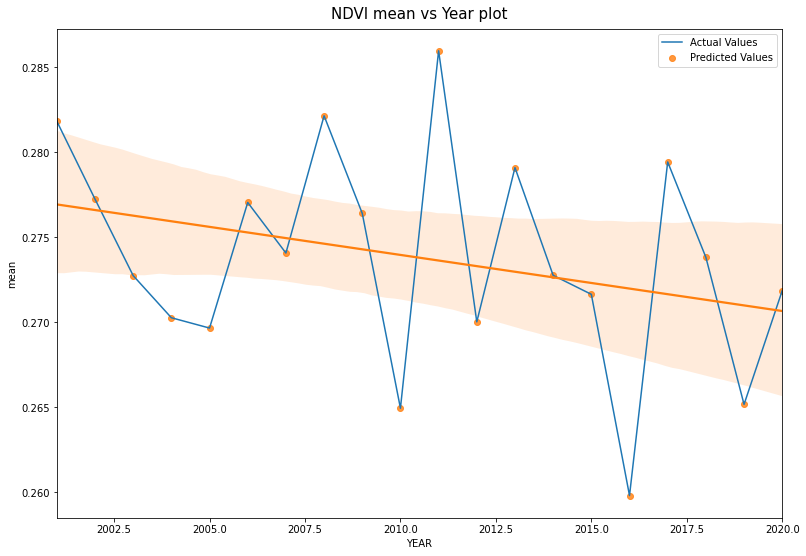

In [16]:
plt.figure(figsize = (13, 9))
plt.plot(country_data['YEAR'], country_data['mean'], label = 'Actual Values')
sns.regplot(x = country_data['YEAR'], y = country_data['mean'], label = 'Predicted Values')
plt.legend()
plt.title('NDVI mean vs Year plot', fontdict = {'fontsize' : 15},pad = 10)



---

## Month wise

In [17]:
grouped = data.groupby(['YEAR', 'MONTH'])
mean = []
dates = []
MONTH = []
YEAR = []

for name, group in grouped:
    mean.append(group['mean'].mean())
    dates.append(group['date'].values[0])
    MONTH.append(name[1])
    YEAR.append(name[0])

dict = {
  'mean' : mean,
  'date' : dates,
  'MONTH' : MONTH,
  'YEAR' : YEAR
}

country_data = pd.DataFrame(dict)

In [18]:
country_data

,mean,date,MONTH,YEAR
0,0.266723,2001-01-01,1,2001
1,0.282063,2001-02-02,2,2001
2,0.262809,2001-03-06,3,2001
3,0.216345,2001-04-07,4,2001
4,0.208221,2001-05-01,5,2001
...,...,...,...,...
231,0.239666,2020-05-08,5,2020
232,0.217478,2020-06-01,6,2020
233,0.229621,2020-07-03,7,2020
234,0.301485,2020-08-04,8,2020


Text(0.5, 1.0, 'Monthly NDVI mean over 20 years')

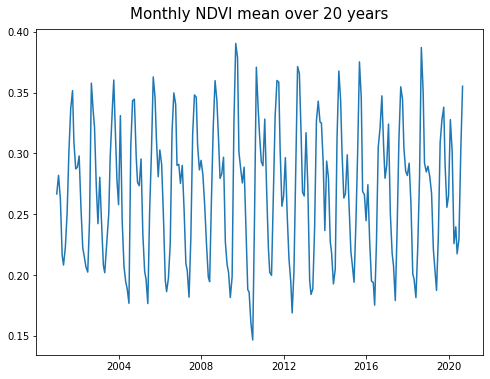

In [19]:
plt.figure(figsize = (8, 6))
temp_data = country_data.set_index('date')
plt.plot(temp_data['mean'])
plt.title('Monthly NDVI mean over 20 years', fontdict = {'fontsize' : 15},pad = 10)

Text(0.5, 1.0, 'Pearson correlation using heatmap')

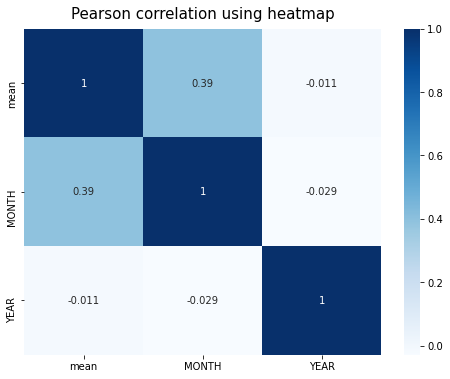

In [20]:
plt.figure(figsize = (8, 6))
sns.heatmap(country_data.corr(), annot = True, cmap = 'Blues')
plt.title('Pearson correlation using heatmap', fontdict = {'fontsize' : 15},pad = 10)

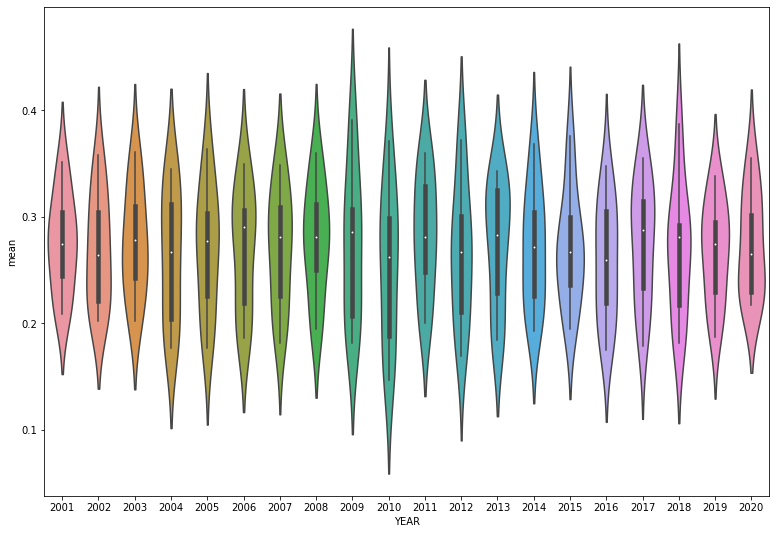

In [21]:
plt.figure(figsize = (13, 9))
sns.violinplot(x = country_data['YEAR'], y = country_data['mean'])
# plt.title('', fontdict = {'fontsize' : 15},pad = 10)

Text(0.5, 1.0, 'Frequency plot for monthly mean over 20 years')

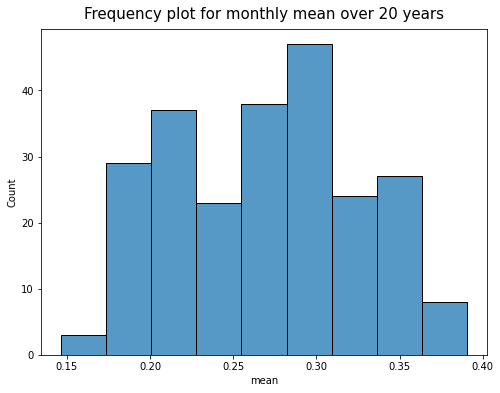

In [22]:
plt.figure(figsize = (8, 6))
sns.histplot(country_data['mean'])
plt.title('Frequency plot for monthly mean over 20 years', fontdict = {'fontsize' : 15},pad = 10)



---

### ML

In [23]:
country_data

,mean,date,MONTH,YEAR
0,0.266723,2001-01-01,1,2001
1,0.282063,2001-02-02,2,2001
2,0.262809,2001-03-06,3,2001
3,0.216345,2001-04-07,4,2001
4,0.208221,2001-05-01,5,2001
...,...,...,...,...
231,0.239666,2020-05-08,5,2020
232,0.217478,2020-06-01,6,2020
233,0.229621,2020-07-03,7,2020
234,0.301485,2020-08-04,8,2020


In [24]:
x = country_data.drop(['mean', 'date'], axis = 1).values
y = country_data['mean']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.9, random_state = 0)

0.22507464700154545 0.0022006324745911005


Text(0.5, 1.0, 'Predictions using Linear Regression')

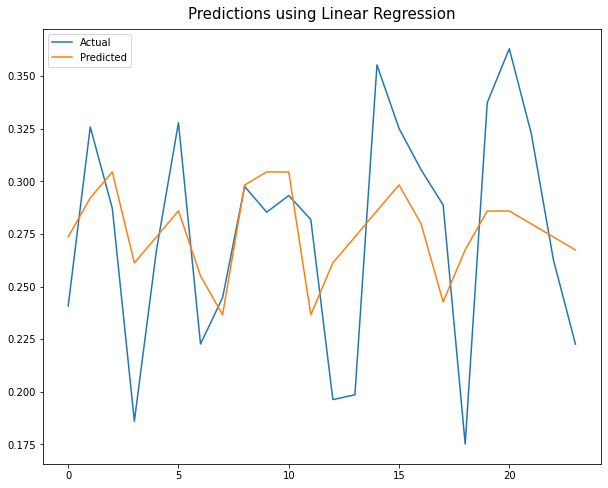

In [25]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(metrics.r2_score(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize = (10, 8))
plt.plot(range(y_test.shape[0]), y_test, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.title('Predictions using Linear Regression', fontdict = {'fontsize' : 15},pad = 10)

0.5382628936210431 0.0013112407112369762


Text(0.5, 1.0, 'Predictions using Decision Tree')

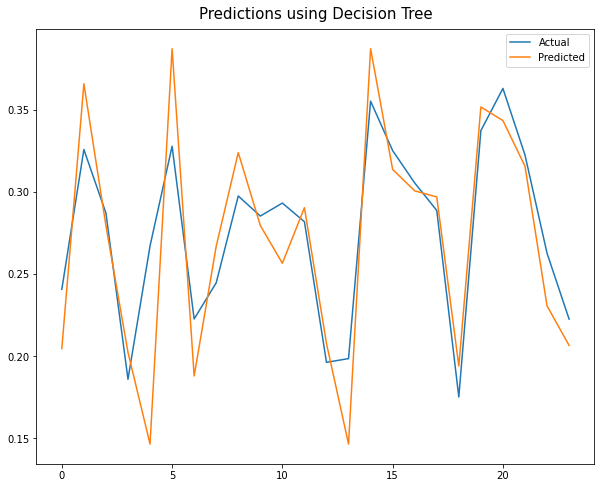

In [26]:
model = DecisionTreeRegressor(criterion = 'mse')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(metrics.r2_score(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize = (10, 8))
plt.plot(range(y_test.shape[0]), y_test, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.title('Predictions using Decision Tree', fontdict = {'fontsize' : 15},pad = 10)

0.7612277094907852 0.0006780653833223165


Text(0.5, 1.0, 'Predictions using Random Forest')

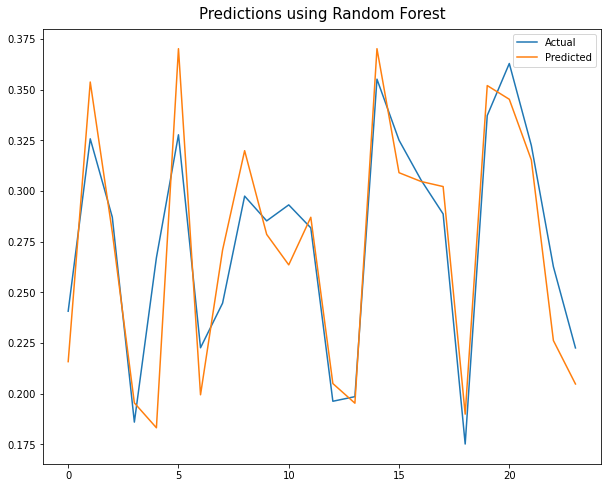

In [27]:
model = RandomForestRegressor(n_estimators = 200, criterion = 'mse')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(metrics.r2_score(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize = (10, 8))
plt.plot(range(y_test.shape[0]), y_test, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.title('Predictions using Random Forest', fontdict = {'fontsize' : 15},pad = 10)

0.8315037263251401 0.0004784955999461613


Text(0.5, 1.0, 'Predictions using Gradient Boosting')

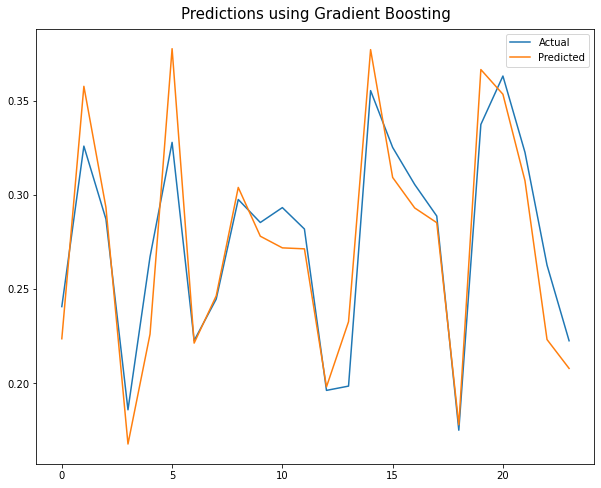

In [28]:
model = GradientBoostingRegressor(n_estimators = 200, criterion = 'mse', learning_rate = 0.1, max_depth = 3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(metrics.r2_score(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize = (10, 8))
plt.plot(range(y_test.shape[0]), y_test, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.title('Predictions using Gradient Boosting', fontdict = {'fontsize' : 15},pad = 10)



---

### Statistical Model(Auto Regression)

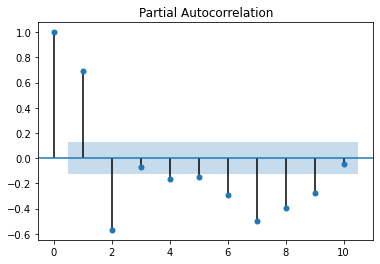

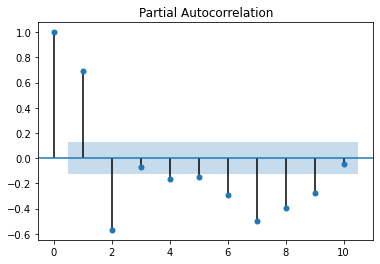

In [29]:
x = country_data['mean'].values
plot_pacf(x, lags = 10)

In [30]:
country_data['mean_shifted_1']  = country_data['mean'].shift(1)
country_data['mean_shifted_2']  = country_data['mean'].shift(2)
country_data.dropna(inplace = True)
country_data

,mean,date,MONTH,YEAR,mean_shifted_1,mean_shifted_2
2,0.262809,2001-03-06,3,2001,0.282063,0.266723
3,0.216345,2001-04-07,4,2001,0.262809,0.282063
4,0.208221,2001-05-01,5,2001,0.216345,0.262809
5,0.222623,2001-06-02,6,2001,0.208221,0.216345
6,0.251355,2001-07-04,7,2001,0.222623,0.208221
...,...,...,...,...,...,...
231,0.239666,2020-05-08,5,2020,0.225862,0.301455
232,0.217478,2020-06-01,6,2020,0.239666,0.225862
233,0.229621,2020-07-03,7,2020,0.217478,0.239666
234,0.301485,2020-08-04,8,2020,0.229621,0.217478


Text(0.5, 1.0, 'Predictions using Auto Regression')

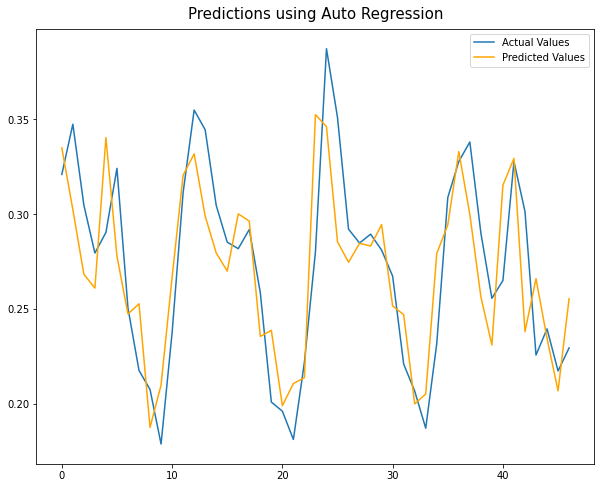

In [31]:
x = country_data[['mean', 'mean_shifted_1']].values
y = country_data['mean_shifted_2'].values

train_size = int(len(x) * 0.80)

x_train, x_test = x[ : train_size], x[train_size : len(x)]
y_train, y_test = y[ : train_size], y[train_size : len(x)]

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

plt.figure(figsize = (10, 8))
plt.plot(y_test, label = 'Actual Values')
plt.plot(y_pred, label = 'Predicted Values', c = 'orange')
plt.legend()
plt.title('Predictions using Auto Regression', fontdict = {'fontsize' : 15},pad = 10)



---

# State
Yearly and monthly analysis on state dataset which is derived from original dataset and using ML to predict NDVI mean values on monthly dataset and yearly dataset

In [ ]:
data = df.drop(['DT_CEN_CD', 'ST_CEN_CD'], axis = 1)
data['YEAR'] = data['date'].dt.year
data['MONTH'] = data['date'].dt.month
data

In [ ]:
data.info()



---


## Year wise



In [ ]:
grouped = data.groupby(['ST_NM','YEAR'])
STATE = []
date = []
mean = []
YEAR = []

for name, group in grouped:
    STATE.append(name[0])
    date.append(group['date'].values[0])
    mean.append(group['mean'].mean())
    YEAR.append(name[1])

dict = {
    'STATE' : STATE,
    'mean' : mean,
    'YEAR' : YEAR,
    'date' : date,
}

state_data = pd.DataFrame(dict)

In [ ]:
state_data

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(state_data.corr(), annot = True, cmap = 'Blues')
plt.title('Pearson correlation plot using heatmap', fontdict = {'fontsize' : 15},pad = 10)

In [ ]:
plt.figure(figsize = (8, 6))
sns.histplot(state_data['mean'])
plt.title('Frequency plot for yearly mean over 20 years', fontdict = {'fontsize' : 15},pad = 10)



---

### ML

In [ ]:
temp_data = pd.get_dummies(state_data.set_index('date'))
temp_data

In [ ]:
x = temp_data.drop('mean', axis = 1).values[:,:]
y = temp_data['mean'].values[:]
x.shape, y.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.r2_score(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize = (10, 8))
plt.plot(y_test[ : 100], label = 'Actual')
plt.plot(y_pred[ : 100], label = 'Prediction')
plt.legend()
plt.title('Predictions using Linear Regression', fontdict = {'fontsize' : 15},pad = 10)

In [ ]:
model = DecisionTreeRegressor(criterion = 'mse')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.r2_score(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize = (10, 8))
plt.plot(y_test[ : 100], label = 'Actual')
plt.plot(y_pred[ : 100], label = 'Prediction')
plt.legend()
plt.title('Predictions using Decision Tree', fontdict = {'fontsize' : 15},pad = 10)

In [ ]:
model = RandomForestRegressor(n_estimators = 300, criterion = 'mse')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.r2_score(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize = (10, 8))
plt.plot(y_test[ : 100], label = 'Actual')
plt.plot(y_pred[ : 100], label = 'Prediction')
plt.legend()
plt.title('Predictions using Random Forest', fontdict = {'fontsize' : 15},pad = 10)

In [ ]:
model = GradientBoostingRegressor(learning_rate = 0.1, criterion = 'mse', n_estimators = 300, max_depth = 3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.r2_score(y_test,y_pred), metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize = (10, 8))
plt.plot(y_test[ : 100], label = 'Actual')
plt.plot(y_pred[ : 100], label = 'Prediction')
plt.legend()
plt.title('Predictions using Gradient Boosting', fontdict = {'fontsize' : 15},pad = 10)



---

## Month wise

In [ ]:
grouped = data.groupby(['ST_NM', 'YEAR', 'MONTH'])
STATE = []
date = []
mean = []
YEAR = []
MONTH = []

for name, group in grouped:
    STATE.append(name[0])
    date.append(group['date'].values[0])
    mean.append(group['mean'].mean())
    YEAR.append(name[1])
    MONTH.append(name[2])

dict = {
  'STATE' : STATE,
  'date' : date,
  'mean' : mean,
  'YEAR' : YEAR,
  'MONTH' : MONTH  
}

state_data = pd.DataFrame(dict)

In [ ]:
state_data

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(state_data.corr(), annot = True, cmap = 'Blues')
plt.title('Pearson correlation using heatmap', fontdict = {'fontsize' : 15},pad = 10)

In [ ]:
plt.figure(figsize = (8, 6))
sns.histplot(state_data['mean'])
plt.title('Frequency plot for montly mean over 20 years', fontdict = {'fontsize' : 15},pad = 10)



---

### ML

In [ ]:
temp_data = pd.get_dummies(state_data.set_index('date'))
temp_data

In [ ]:
x = temp_data.drop('mean', axis = 1).values[:, :]
y = temp_data['mean'].values[:]
x.shape, y.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.r2_score(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize = (10, 8))
plt.plot(y_test[ : 100], label = 'Actual')
plt.plot(y_pred[ : 100], label = 'Prediction')
plt.legend()
plt.title('Predictions using Linear Regression', fontdict = {'fontsize' : 15},pad = 10)

In [ ]:
model = DecisionTreeRegressor(criterion = 'mse')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.r2_score(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize = (10, 8))
plt.plot(y_test[ : 100], label = 'Actual')
plt.plot(y_pred[ : 100], label = 'Prediction')
plt.legend()
plt.title('Predictions using Decision Tree', fontdict = {'fontsize' : 15},pad = 10)

In [ ]:
model = RandomForestRegressor(n_estimators = 300, criterion = 'mse')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.r2_score(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize = (10, 8))
plt.plot(y_test[ : 100], label = 'Actual')
plt.plot(y_pred[ : 100], label = 'Prediction')
plt.legend()
plt.title('Predictions using Random Forest', fontdict = {'fontsize' : 15},pad = 10)

In [ ]:
model = GradientBoostingRegressor(learning_rate = 0.5, criterion = 'mse', n_estimators = 300, max_depth = 3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.r2_score(y_test,y_pred), metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize = (10, 8))
plt.plot(y_test[ : 100], label = 'Actual')
plt.plot(y_pred[ : 100], label = 'Prediction')
plt.legend()
plt.title('Predictions using Gradient Boosting', fontdict = {'fontsize' : 15},pad = 10)



---


# Districts
Yearly and monthly analysis on district dataset which is derived from original dataset and using ML to predict NDVI mean values on yearly dataset and monthly per-district dataset



---

## Year

In [56]:
data = df.drop(['DT_CEN_CD', 'ST_CEN_CD'], axis = 1)
data['YEAR'] = data['date'].dt.year
data['MONTH'] = data['date'].dt.month
data

,S.No.,DISTRICT,ST_NM,date,mean,YEAR,MONTH
0,1,Chandigarh,Chandigarh,2001-01-01,0.206043,2001,1
1,2,Data Not Available,Jammu and Kashmir,2001-01-01,0.016797,2001,1
2,3,Anantnag,Jammu and Kashmir,2001-01-01,0.040989,2001,1
3,4,Badgam,Jammu and Kashmir,2001-01-01,0.079289,2001,1
4,5,Baramula,Jammu and Kashmir,2001-01-01,0.083400,2001,1
...,...,...,...,...,...,...,...
304434,304435,Thanjavur,Tamil Nadu,2020-09-13,0.440714,2020,9
304435,304436,Thiruvarur,Tamil Nadu,2020-09-13,0.416249,2020,9
304436,304437,Nagapattinam,Tamil Nadu,2020-09-13,0.330633,2020,9
304437,304438,Pondicherry,Puducherry,2020-09-13,0.076307,2020,9


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304439 entries, 0 to 304438
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   S.No.     304439 non-null  int64         
 1   DISTRICT  304439 non-null  object        
 2   ST_NM     304439 non-null  object        
 3   date      304439 non-null  datetime64[ns]
 4   mean      304439 non-null  float64       
 5   YEAR      304439 non-null  int64         
 6   MONTH     304439 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 16.3+ MB


In [58]:
grouped = data.groupby(['DISTRICT', 'YEAR'])
DISTRICT = []
date = []
mean = []
YEAR = []

for name, group in grouped:
    DISTRICT.append(name[0])
    date.append(group['date'].values[0])
    mean.append(group['mean'].mean())
    YEAR.append(name[1])

dict = {
  'DISTRICT' : DISTRICT,
  'date' : date,
  'mean' : mean,
  'YEAR' : YEAR,
}

district_data = pd.DataFrame(dict)

In [59]:
district_data

,DISTRICT,date,mean,YEAR
0,Adilabad,2001-02-02,0.293312,2001
1,Adilabad,2002-01-09,0.255547,2002
2,Adilabad,2003-01-17,0.273842,2003
3,Adilabad,2004-01-09,0.293261,2004
4,Adilabad,2005-01-09,0.281734,2005
...,...,...,...,...
11695,Zunheboto,2016-01-01,0.434577,2016
11696,Zunheboto,2017-01-01,0.429459,2017
11697,Zunheboto,2018-01-01,0.426622,2018
11698,Zunheboto,2019-01-01,0.414437,2019


Text(0.5, 1.0, 'Pearson correlation using heatmap')

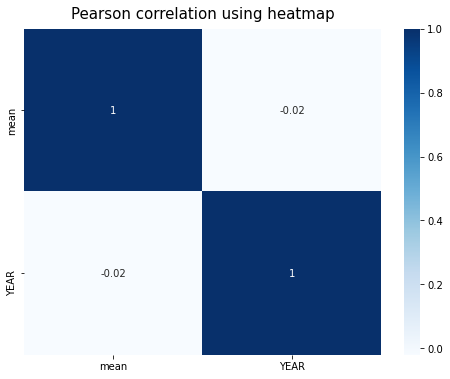

In [60]:
plt.figure(figsize = (8, 6))
sns.heatmap(district_data.corr(), annot = True, cmap = 'Blues')
plt.title('Pearson correlation using heatmap', fontdict = {'fontsize' : 15},pad = 10)

Text(0.5, 1.0, 'Frequency plot for yearly mean over 20 years')

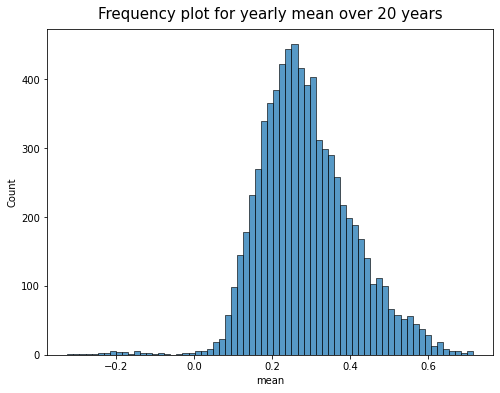

In [61]:
plt.figure(figsize = (8, 6))
sns.histplot(state_data['mean'])
plt.title('Frequency plot for yearly mean over 20 years', fontdict = {'fontsize' : 15},pad = 10)



---

### ML

In [62]:
temp_data = pd.get_dummies(district_data.set_index('date'))
temp_data

,mean,YEAR,DISTRICT_Adilabad,DISTRICT_Agra,DISTRICT_Ahmadabad,DISTRICT_Ahmadnagar,DISTRICT_Aizawl,DISTRICT_Ajmer,DISTRICT_Akola,DISTRICT_Alappuzha,DISTRICT_Aligarh,DISTRICT_Allahabad,DISTRICT_Almora,DISTRICT_Alwar,DISTRICT_Ambala,DISTRICT_Ambedkar Nagar,DISTRICT_Amravati,DISTRICT_Amreli,DISTRICT_Amritsar,DISTRICT_Anand,DISTRICT_Anantapur,DISTRICT_Anantnag,DISTRICT_Andamans,DISTRICT_Anugul,DISTRICT_Araria,DISTRICT_Ariyalur,DISTRICT_Auraiya,DISTRICT_Aurangabad,DISTRICT_Azamgarh,DISTRICT_Badgam,DISTRICT_Bagalkot,DISTRICT_Bageshwar,DISTRICT_Baghpat,DISTRICT_Bahraich,DISTRICT_Balaghat,DISTRICT_Balangir,DISTRICT_Baleshwar,DISTRICT_Ballia,DISTRICT_Balrampur,DISTRICT_Banas Kantha,...,DISTRICT_Udham Singh Nagar,DISTRICT_Udhampur,DISTRICT_Udupi,DISTRICT_Ujjain,DISTRICT_Ukhrul,DISTRICT_Umaria,DISTRICT_Una,DISTRICT_Unnao,DISTRICT_Upper Siang,DISTRICT_Upper Subansiri,DISTRICT_Uttar Dinajpur,DISTRICT_Uttara Kannada,DISTRICT_Uttarkashi,DISTRICT_Vadodara,DISTRICT_Vaishali,DISTRICT_Valsad,DISTRICT_Varanasi,DISTRICT_Vellore,DISTRICT_Vidisha,DISTRICT_Viluppuram,DISTRICT_Virudhunagar,DISTRICT_Visakhapatnam,DISTRICT_Vizianagaram,DISTRICT_Warangal,DISTRICT_Wardha,DISTRICT_Washim,DISTRICT_Wayanad,DISTRICT_West,DISTRICT_West Garo Hills,DISTRICT_West Godavari,DISTRICT_West Kameng,DISTRICT_West Khasi Hills,DISTRICT_West Nimar,DISTRICT_West Siang,DISTRICT_West Tripura,DISTRICT_Wokha,DISTRICT_Yamunanagar,DISTRICT_Yanam,DISTRICT_Yavatmal,DISTRICT_Zunheboto
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-02-02,0.293312,2001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2002-01-09,0.255547,2002,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2003-01-17,0.273842,2003,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004-01-09,0.293261,2004,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-01-09,0.281734,2005,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01,0.434577,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2017-01-01,0.429459,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2018-01-01,0.426622,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [63]:
x = temp_data.drop('mean', axis = 1).values[:,:]
y = temp_data['mean'].values[:]
x.shape, y.shape

((11700, 587), (11700,))

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9360, 587), (2340, 587), (9360,), (2340,))

0.8711943262460009 0.0008592238579312305


Text(0.5, 1.0, 'Predictions using Linear Regression')

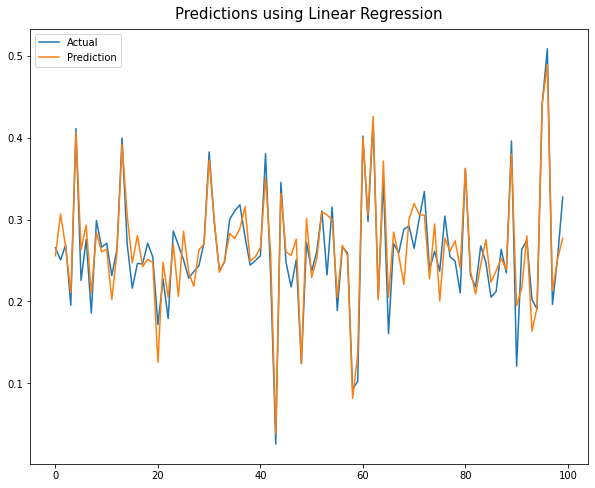

In [65]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.r2_score(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize = (10, 8))
plt.plot(y_test[ : 100], label = 'Actual')
plt.plot(y_pred[ : 100], label = 'Prediction')
plt.legend()
plt.title('Predictions using Linear Regression', fontdict = {'fontsize' : 15},pad = 10)

0.7887806176711527 0.0014089808877600712


Text(0.5, 1.0, 'Predictions using Decision Tree')

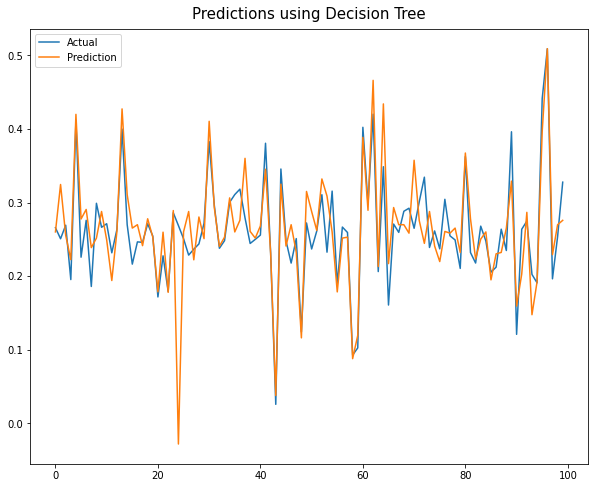

In [66]:
model = DecisionTreeRegressor(criterion = 'mse')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.r2_score(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize = (10, 8))
plt.plot(y_test[ : 100], label = 'Actual')
plt.plot(y_pred[ : 100], label = 'Prediction')
plt.legend()
plt.title('Predictions using Decision Tree', fontdict = {'fontsize' : 15},pad = 10)

In [67]:
# model = RandomForestRegressor(n_estimators = 300, criterion = 'mse')
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# print(metrics.r2_score(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred))

# plt.figure(figsize = (10, 8))
# plt.plot(y_test[ : 100], label = 'Actual')
# plt.plot(y_pred[ : 100], label = 'Prediction')
# plt.legend()
# plt.title('Predictions using Random Forest', fontdict = {'fontsize' : 15},pad = 10)

0.8463719166777055 0.0010248066765355826


Text(0.5, 1.0, 'Predictions using Gradient Boosting')

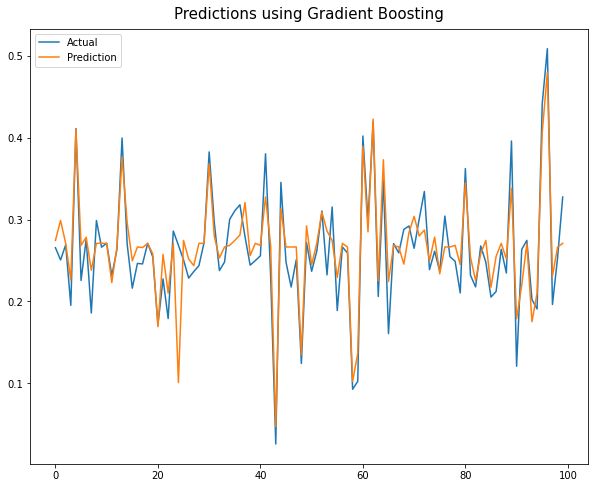

In [68]:
model = GradientBoostingRegressor(learning_rate = 0.5, criterion = 'mse', n_estimators = 300, max_depth = 3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.r2_score(y_test,y_pred), metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize = (10, 8))
plt.plot(y_test[ : 100], label = 'Actual')
plt.plot(y_pred[ : 100], label = 'Prediction')
plt.legend()
plt.title('Predictions using Gradient Boosting', fontdict = {'fontsize' : 15},pad = 10)



---

## Per District (Month wise)
Districts are choosen based on number of data points available

In [ ]:
data = df.drop(['DT_CEN_CD', 'ST_CEN_CD'], axis = 1)
data['YEAR'] = data['date'].dt.year
data['MONTH'] = data['date'].dt.month
data

In [ ]:
data.info()

In [ ]:
grouped = data.groupby(['DISTRICT', 'YEAR', 'MONTH'])
DISTRICT = []
date = []
mean = []
YEAR = []
MONTH = []

for name, group in grouped:
    DISTRICT.append(name[0])
    date.append(group['date'].values[0])
    mean.append(group['mean'].mean())
    YEAR.append(name[1])
    MONTH.append(name[2])

dict = {
  'DISTRICT' : DISTRICT,
  'date' : date,
  'mean' : mean,
  'YEAR' : YEAR,
  'MONTH' : MONTH  
}

district_data = pd.DataFrame(dict)

In [ ]:
district_data

In [ ]:
district_data.info()

In [ ]:
districts = {}
for district in district_data['DISTRICT'].unique():
    if district_data[district_data['DISTRICT'] == district].shape[0] >= 235:
        districts[district] = district_data[district_data['DISTRICT'] == district].shape[0]

districts
districts = list(districts.keys())
districts.remove('Data Not Available')
districts

---
### Churu


In [ ]:
temp_data = district_data[district_data['DISTRICT'] == districts[0]].set_index('date')
plt.figure(figsize = (13, 9))
plt.plot(temp_data['mean'], label = districts[0])
plt.legend()
plt.xticks(temp_data.index[ : : 20])
plt.title('Monthly NDVI mean over 20 years', fontdict = {'fontsize' : 15},pad = 10)

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(temp_data.corr(), annot = True, cmap = 'Blues')
plt.title('Pearson correlation using heatmap', fontdict = {'fontsize' : 15},pad = 10)

In [ ]:
x = temp_data['mean'].values
plot_pacf(x, lags = 10)

In [ ]:
temp_data['mean_shifted_1']  = temp_data['mean'].shift(1)
temp_data['mean_shifted_2']  = temp_data['mean'].shift(2)
temp_data.head()

In [ ]:
temp_data.dropna(inplace = True)
temp_data.head()
temp_data.shape

In [ ]:
x = temp_data[['mean', 'mean_shifted_1']].values
y = temp_data['mean_shifted_2'].values

train_size = int(len(x) * 0.80)

x_train, x_test = x[ : train_size], x[train_size : len(x)]
y_train, y_test = y[ : train_size], y[train_size : len(x)]

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

plt.figure(figsize = (10, 8))
plt.plot(y_test[:], label = 'Actual Values')
plt.plot(y_pred[:], label = 'Predicted Values', c = 'orange')
plt.legend()
plt.title('Predictions using Auto Regression', fontdict = {'fontsize' : 15},pad = 10)



---

### Firozpur

In [ ]:
temp_data = district_data[district_data['DISTRICT'] == districts[1]].set_index('date')
plt.figure(figsize = (13, 9))
plt.plot(temp_data['mean'], label = districts[1])
plt.legend()
plt.xticks(temp_data.index[ : : 20])
plt.title('Monthly NDVI mean over 20 years', fontdict = {'fontsize' : 15},pad = 10)

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(temp_data.corr(), annot = True, cmap = 'Blues')
plt.title('Pearson correlation using heatmap', fontdict = {'fontsize' : 15},pad = 10)

In [ ]:
x = temp_data['mean'].values
plot_pacf(x, lags = 10)

In [ ]:
temp_data['mean_shifted_1'] = temp_data['mean'].shift(1)
temp_data['mean_shifted_2'] = temp_data['mean'].shift(2)
temp_data['mean_shifted_3'] = temp_data['mean'].shift(3)
temp_data['mean_shifted_4'] = temp_data['mean'].shift(4)
temp_data.head()

In [ ]:
temp_data.dropna(inplace = True)
temp_data.head()

In [ ]:
x = temp_data[['mean', 'mean_shifted_1', 'mean_shifted_2', 'mean_shifted_3']].values
y = temp_data['mean_shifted_4'].values

train_size = int(len(x) * 0.80)

x_train, x_test = x[ : train_size], x[train_size : len(x)]
y_train, y_test = y[ : train_size], y[train_size : len(x)]


model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

plt.figure(figsize = (10,8))
plt.plot(y_test[ : ], label = 'Actual Values')
plt.plot(y_pred[ : ], label = 'Predicted Values', c = 'orange')
plt.legend()
plt.title('Predictions using Auto Regression', fontdict = {'fontsize' : 15},pad = 10)



---

### Ganganagar

In [ ]:
temp_data = district_data[district_data['DISTRICT'] == districts[2]].set_index('date')
plt.figure(figsize = (13, 9))
plt.plot(temp_data['mean'], label = districts[2])
plt.legend()
plt.xticks(temp_data.index[ : : 20])
plt.title('Montly NDVI mean over 20 years', fontdict = {'fontsize' : 15},pad = 10)

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(temp_data.corr(), annot = True, cmap = 'Blues')
plt.title('Pearson correlation using heatmap', fontdict = {'fontsize' : 15},pad = 10)

In [ ]:
x = temp_data['mean'].values
plot_pacf(x, lags = 10)

In [ ]:
temp_data['mean_shifted_1'] = temp_data['mean'].shift(1)
temp_data['mean_shifted_2'] = temp_data['mean'].shift(2)
temp_data.head()

In [ ]:
temp_data.dropna(inplace = True)
temp_data.head()

In [ ]:
x = temp_data[['mean', 'mean_shifted_1']].values
y = temp_data['mean_shifted_2'].values

train_size = int(len(x) * 0.80)

x_train, x_test = x[ : train_size], x[train_size : len(x)]
y_train, y_test = y[ : train_size], y[train_size : len(x)]

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

plt.figure(figsize = (10,8))
plt.plot(y_test[ : ], label = 'Actual Values')
plt.plot(y_pred[ : ], label = 'Predicted Values', c = 'orange')
plt.legend()
plt.title('Predictions using Auto Regression', fontdict = {'fontsize' : 15},pad = 10)



---

### Leh

In [ ]:
temp_data = district_data[district_data['DISTRICT'] == districts[3]].set_index('date')
plt.figure(figsize = (13, 9))
plt.plot(temp_data['mean'], label = districts[3])
plt.legend()
plt.xticks(temp_data.index[ : : 20])
plt.title('Monthly NDVI mean over 20 years', fontdict = {'fontsize' : 15},pad = 10)

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(temp_data.corr(), annot = True, cmap = 'Blues')
plt.title('Pearson correlation usig heatmap', fontdict = {'fontsize' : 15},pad = 10)

In [ ]:
x = temp_data['mean'].values
plot_pacf(x, lags = 10) 

In [ ]:
temp_data['mean_shifted_1'] = temp_data['mean'].shift(1)
temp_data['mean_shifted_2'] = temp_data['mean'].shift(2)
temp_data.head()

In [ ]:
temp_data.dropna(inplace = True)
temp_data.head()

In [ ]:
x = temp_data[['mean', 'mean_shifted_1']].values
y = temp_data['mean_shifted_2'].values

train_size = int(len(x) * 0.80)

x_train, x_test = x[ : train_size], x[train_size : len(x)]
y_train, y_test = y[ : train_size], y[train_size : len(x)]

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

plt.figure(figsize = (10,8))
plt.plot(y_test[ : ], label = 'Actual Values')
plt.plot(y_pred[ : ], label = 'Predicted Values', c = 'orange')
plt.legend()
plt.title('Predictions using Auto Regression', fontdict = {'fontsize' : 15},pad = 10)